# <div style="text-align:center"><b>StackOverflow Developer Survey 2023 Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
survey_results = pd.read_csv("results_2023.csv")

In [38]:
survey_results.isnull().any()

ResponseId             False
Q120                   False
MainBranch             False
Age                    False
Employment              True
                       ...  
ProfessionalTech        True
Industry                True
SurveyLength            True
SurveyEase              True
ConvertedCompYearly     True
Length: 84, dtype: bool

## Question 1: At what companies do developers get paid the most?

In [47]:
survey_results.head()
highest_paying_companies = survey_results.groupby("Industry")["ConvertedCompYearly"].mean().sort_values(ascending=False)
x = highest_paying_companies.index
y = highest_paying_companies.values
x, y

(Index(['Financial Services', 'Advertising Services',
        'Retail and Consumer Services', 'Healthcare', 'Other',
        'Manufacturing, Transportation, or Supply Chain', 'Insurance',
        'Information Services, IT, Software Development, or other Technology',
        'Oil & Gas', 'Legal Services', 'Higher Education', 'Wholesale'],
       dtype='object', name='Industry'),
 array([151056.59467456, 127260.60687023, 100742.59415584,  98332.89457831,
         97597.6810415 ,  96500.59585492,  96185.79620853,  91739.45591518,
         91134.32894737,  86671.75714286,  75863.10220994,  57667.90566038]))

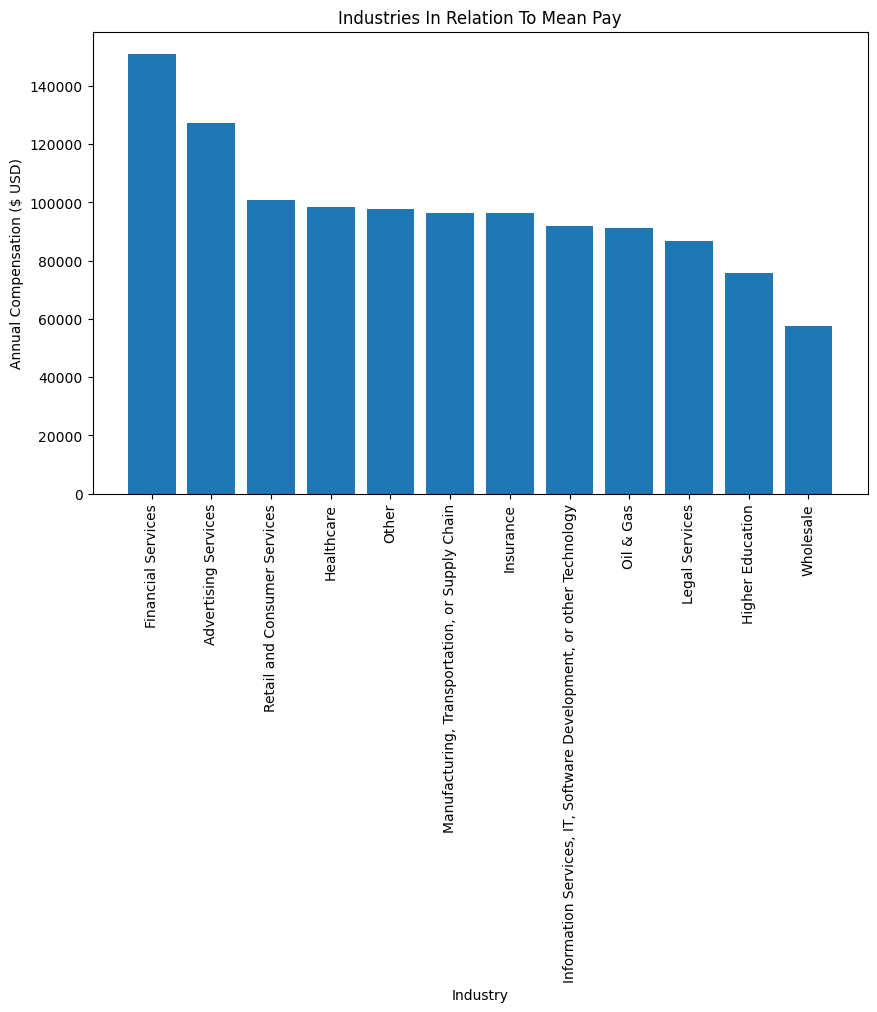

In [48]:
plt.figure(figsize=(10, 6))
plt.bar(x, y)
plt.title("Industries In Relation To Mean Pay")
plt.xticks(rotation=90)
plt.xlabel("Industry"), plt.ylabel("Annual Compensation ($ USD)")
plt.show()

## Question 2: How much does remote working matter to employees?

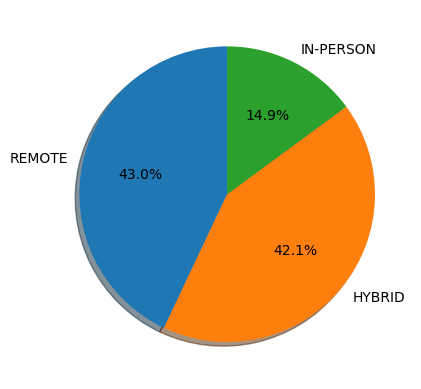

In [63]:
remote_impact = survey_results["RemoteWork"].value_counts()
remote_impact.values
labels = ["REMOTE", "HYBRID", "IN-PERSON"]

plt.pie(remote_impact.values, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True)
plt.show()

## Question 3: How does coding experience affect the level of pay?

In [80]:
coding_experience = survey_results.groupby("YearsCode")["ConvertedCompYearly"].mean()
x = coding_experience.index
y = coding_experience.values
coding_experience.head(10)

YearsCode
1      23156.439024
10     90697.677011
11     92144.156609
12     95468.813977
13     97830.852035
14     92811.167173
15     99846.263524
16    104397.793515
17    108360.372951
18    109953.629151
Name: ConvertedCompYearly, dtype: float64

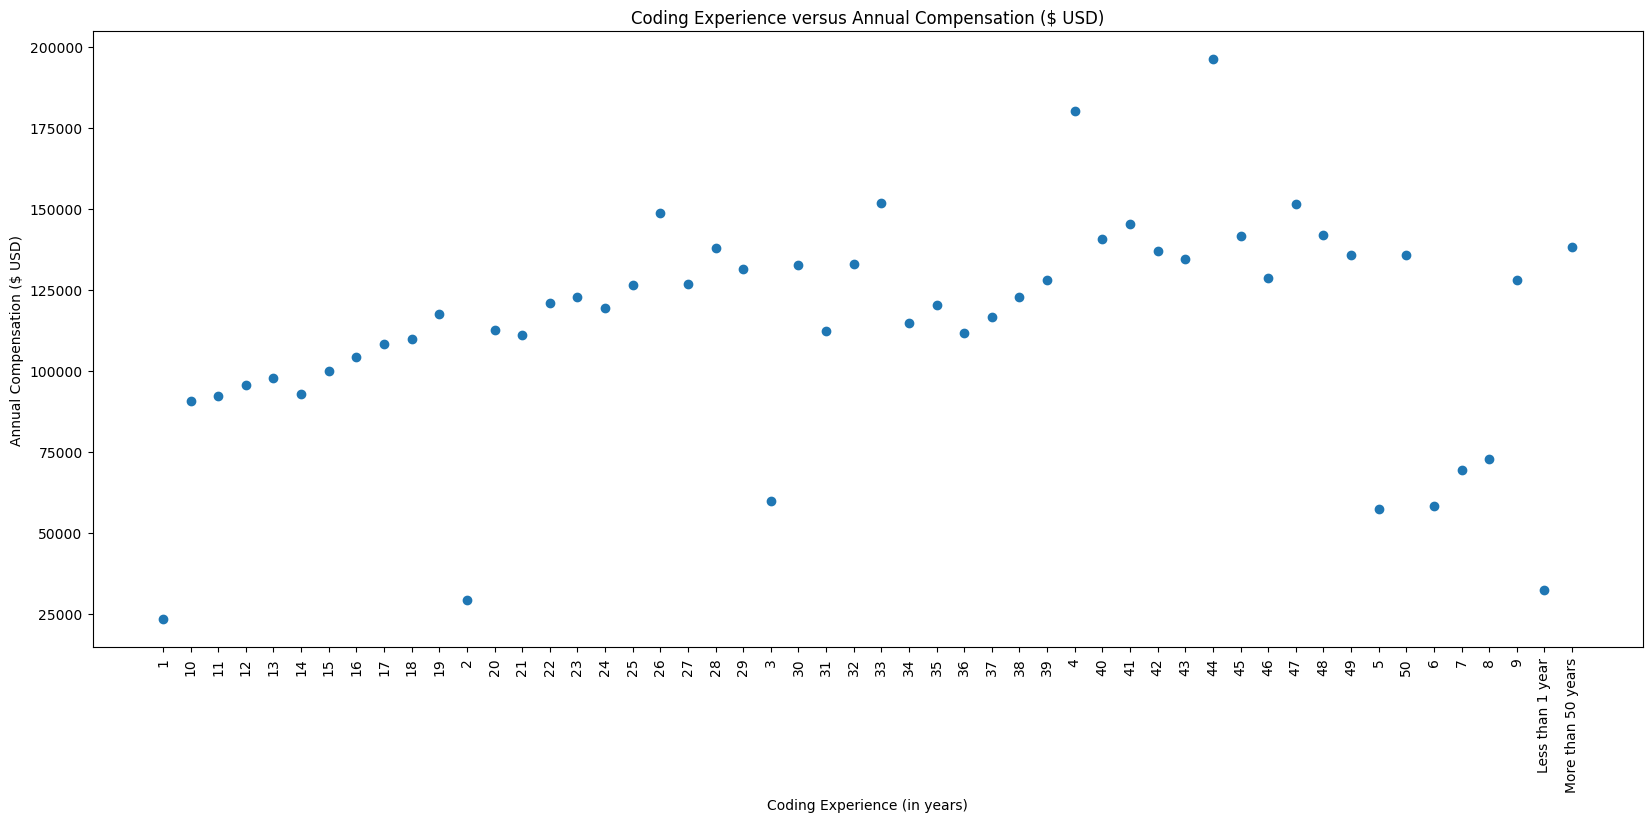

In [75]:
plt.figure(figsize=(20, 8))
plt.scatter(x, y)
plt.title("Coding Experience versus Annual Compensation ($ USD)")
plt.xlabel("Coding Experience (in years)")
plt.xticks(rotation=90)
plt.ylabel("Annual Compensation ($ USD)")
plt.show()

## Look towards converting the Code experience in years to an integer and then passing the sorted values to have a comprehensive scatterplot.

## Question 4: What's the most popular method of learning to code?

## Question 5: Are you more likely to get a developer job with a master's degree?

In [121]:
employed_data = survey_results[survey_results["Employment"].notna()]
employed_data["Employed"] = employed_data["Employment"].apply(lambda x: "Yes" if "Employed, full-time" in x or "self-employed" in x else "No")
employed_data["Has_Masters"] = employed_data["EdLevel"].apply(lambda x: "Yes" if "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)" in x else "No")
# employed_w_masters = employed_data[(employed_data["Employed"] == "Yes") & (employed_data["Has_Masters"] == "Yes")]

<ipython-input-121-11cb9b6702ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employed_data["Employed"] = employed_data["Employment"].apply(lambda x: "Yes" if "Employed, full-time" in x or "self-employed" in x else "No")
<ipython-input-121-11cb9b6702ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employed_data["Has_Masters"] = employed_data["EdLevel"].apply(lambda x: "Yes" if "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)" in x else "No")


Yes    7290
Name: Has_Masters, dtype: int64